In [4]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [5]:
df = pd.read_csv('training.csv')

In [6]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [7]:
# df = df.drop([['EventId', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']])

In [8]:
data = df.sample(frac=0.4, replace=True, random_state=1)

In [9]:
data_logit = data

In [6]:
pandas_profiling.ProfileReport(data)
# %timeit

Number of variables,34
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,25.9 MiB
Average record size in memory,272.0 B
Numeric,22
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,11


In [10]:
data.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
128037,228037,91.711,53.675,62.066,1.147,-999.000,-999.000,-999.000,3.081,1.147,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.681611,b
229611,329611,133.885,29.671,82.195,97.935,-999.000,-999.000,-999.000,2.193,1.490,...,1,96.549,-1.642,0.633,-999.000,-999.000,-999.000,96.549,1.681611,b
208780,308780,254.414,70.622,149.097,51.997,1.579,154.569,-0.539,3.571,3.507,...,2,90.525,-1.080,-1.979,36.793,0.498,1.088,127.317,1.514261,b
5192,105192,79.739,18.385,58.593,23.737,-999.000,-999.000,-999.000,2.945,23.737,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.681611,b
229119,329119,135.972,41.162,94.445,11.881,-999.000,-999.000,-999.000,2.594,41.308,...,1,52.337,0.468,1.238,-999.000,-999.000,-999.000,52.337,0.018636,s


In [12]:
# data['DER_deltaeta_jet_jet'].corr(data['Label'])

In [ ]:
data.PRI_jet_num.unique()

In [13]:
data_logit['Label']=(data_logit.Label=='s')*1

In [14]:
data_logit.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
128037,228037,91.711,53.675,62.066,1.147,-999.000,-999.000,-999.000,3.081,1.147,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.681611,0
229611,329611,133.885,29.671,82.195,97.935,-999.000,-999.000,-999.000,2.193,1.490,...,1,96.549,-1.642,0.633,-999.000,-999.000,-999.000,96.549,1.681611,0
208780,308780,254.414,70.622,149.097,51.997,1.579,154.569,-0.539,3.571,3.507,...,2,90.525,-1.080,-1.979,36.793,0.498,1.088,127.317,1.514261,0
5192,105192,79.739,18.385,58.593,23.737,-999.000,-999.000,-999.000,2.945,23.737,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.681611,0
229119,329119,135.972,41.162,94.445,11.881,-999.000,-999.000,-999.000,2.594,41.308,...,1,52.337,0.468,1.238,-999.000,-999.000,-999.000,52.337,0.018636,1


In [15]:
data.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [16]:
# data.isnull().sum()

In [17]:
data.shape

(100000, 33)

In [18]:
# data_ = pd.read_csv('test.csv')

In [19]:
# data_.head()

In [20]:
X = data_logit.drop('Label', axis = 1)

In [21]:
y = y = data_logit['Label']

In [22]:
feature_cols = X.columns

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=None, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = dt.predict(X_test)

In [20]:
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred)))

Accuracy:1.0
F1: 1.0


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(X_train.columns, logreg.coef_[0])

In [23]:
## training the model
from sklearn import metrics
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 0.3018455503886641
Testing Error: 0.344723198101694


In [24]:
from sklearn.preprocessing import RobustScaler

rc=RobustScaler()
X_train_scaled= rc.fit_transform(X_train)
X_test_scaled = rc.transform(X_test)

In [25]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [26]:
# Create logistic regression
logistic = linear_model.LogisticRegression()

In [27]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = C_param_range = [0.48]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [28]:
# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

In [29]:
# Fit grid search
model = clf_gs.fit(X_train_scaled, y_train)

In [30]:
# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.48


In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [32]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))


Training F1 Score: 1.0
Testing F1 Score: 1.0


In [33]:
# Score It
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_test))
print('--'*40)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_test))

# Accuracy
print('--'*40)
logreg_accuracy = round(accuracy_score(y_test, y_pred_test) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[16404     0]
 [    0  8596]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16404
           1       1.00      1.00      1.00      8596

   micro avg       1.00      1.00      1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

--------------------------------------------------------------------------------
Accuracy 100.0 %


In [34]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [35]:
# separate minority and majority classes
signal = training[training ['Label']==1]
background = training[training['Label'] ==0]

In [36]:
print('signal count: '+ str(len(signal)))
print('background count: '+ str(len(background)))

signal count: 25825
background count: 49175


In [37]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 1.0


In [38]:
# Sort feature importances in descending order

model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)
model_params

[('Weight', -303.49727358044356),
 ('PRI_jet_leading_pt', -0.8445707901932479),
 ('DER_deltar_tau_lep', 0.5729582925892776),
 ('PRI_jet_num', -0.4662837133528103),
 ('PRI_met_sumet', -0.3230307631693449),
 ('DER_deltaeta_jet_jet', -0.29658298056482885),
 ('PRI_lep_pt', 0.2713982592202464),
 ('DER_pt_ratio_lep_tau', -0.19476252915034173),
 ('DER_pt_tot', -0.1699477282868807),
 ('DER_pt_h', 0.14695603086018602),
 ('PRI_tau_pt', 0.10925568145378872),
 ('PRI_met', 0.10170960418442863),
 ('DER_mass_vis', 0.050990745798954205),
 ('PRI_tau_eta', -0.03710942675953869),
 ('PRI_tau_phi', 0.018727896031131296),
 ('DER_prodeta_jet_jet', -0.006627875857174991),
 ('PRI_jet_subleading_phi', -0.005479887815407668),
 ('DER_lep_eta_centrality', -0.004560973426669229),
 ('DER_mass_MMC', 0.0033484947361722226),
 ('PRI_jet_subleading_eta', -0.0003056538044444962),
 ('EventId', 0.0),
 ('DER_mass_transverse_met_lep', 0.0),
 ('DER_mass_jet_jet', 0.0),
 ('DER_sum_pt', 0.0),
 ('DER_met_phi_centrality', 0.0),
 (

NameError: name 'names' is not defined

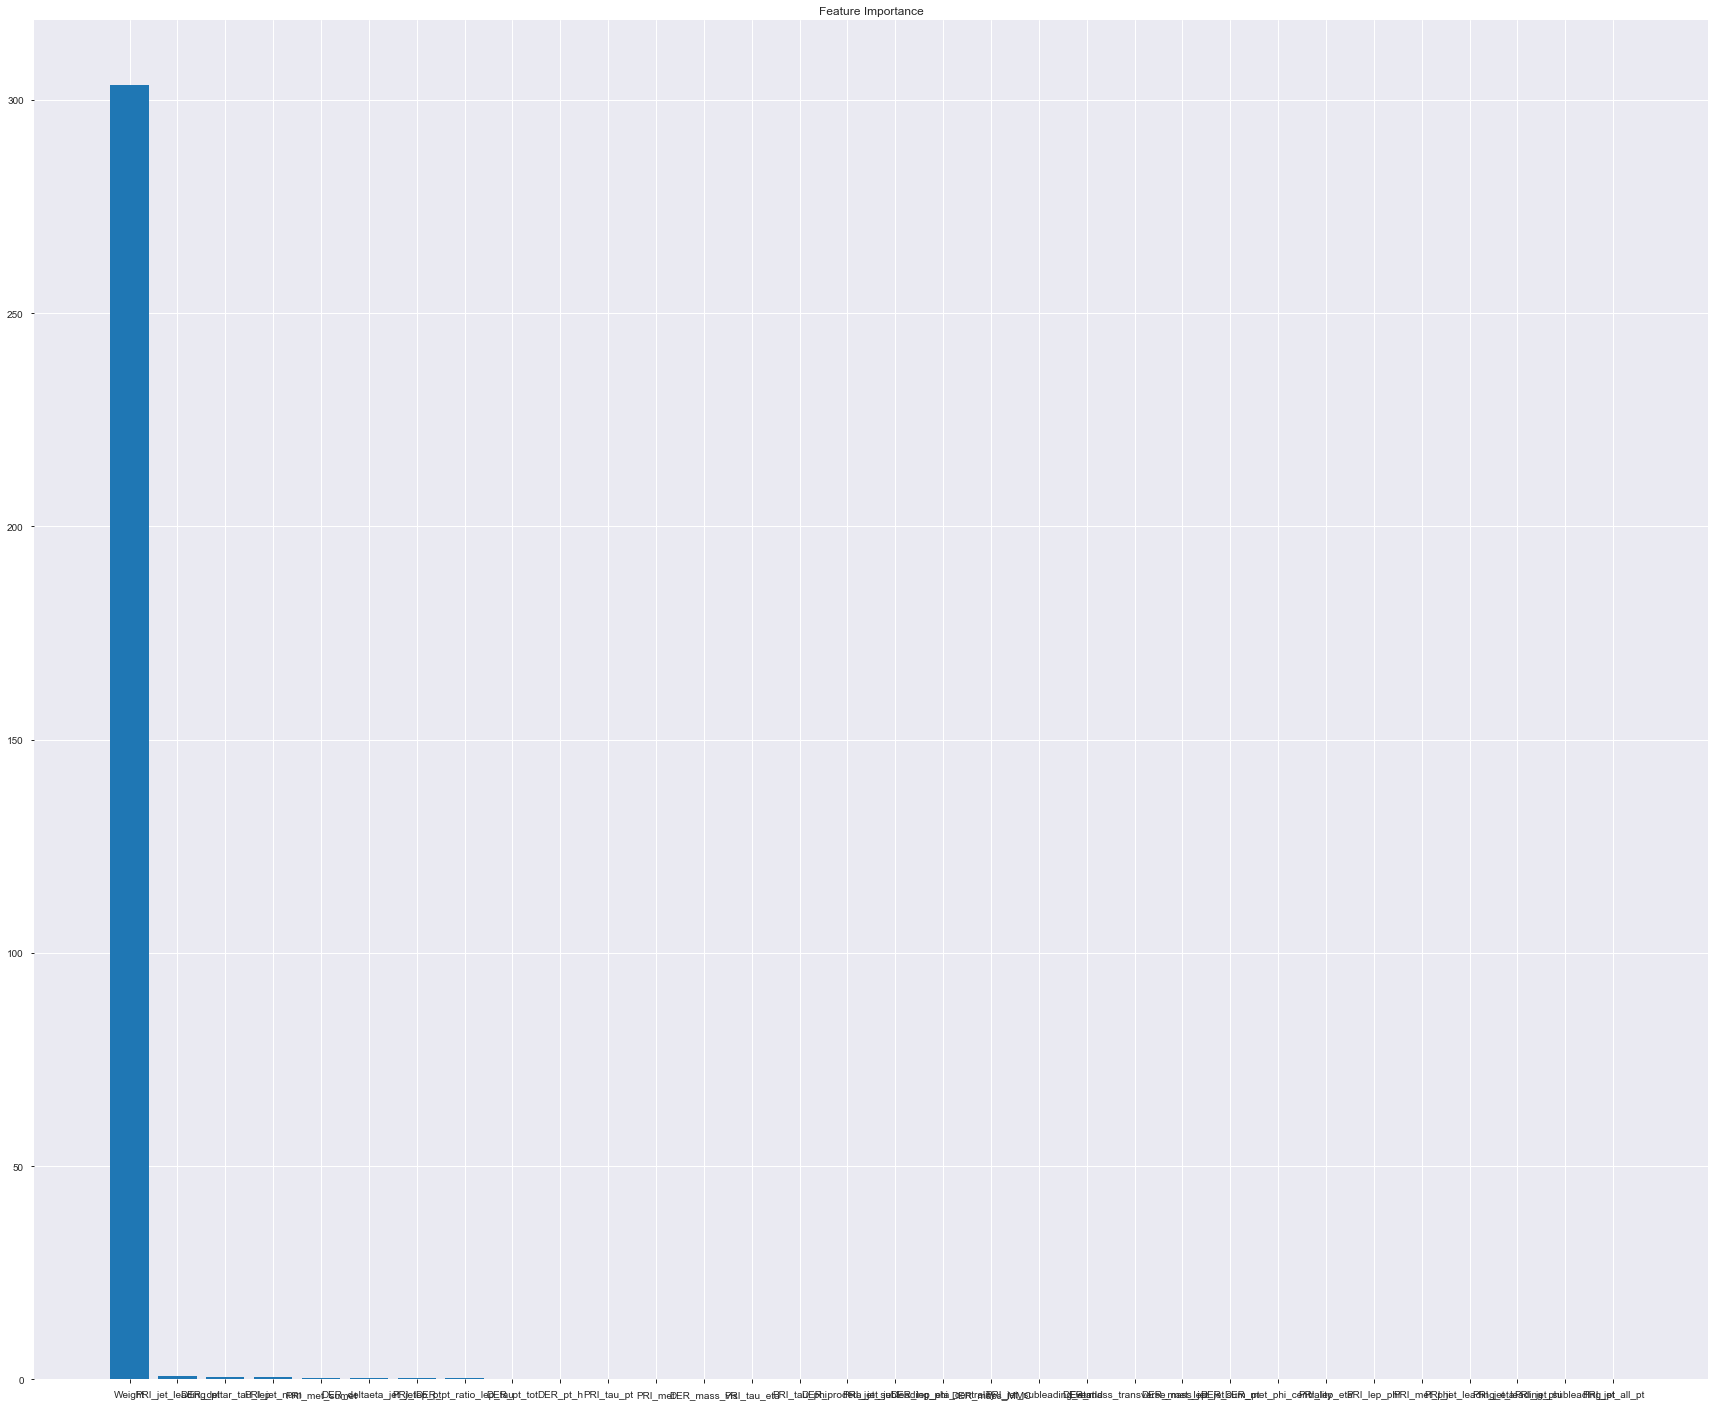

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize = (30,25))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

SVM CLASSIFIER

In [40]:
# Fit
# Import model
from sklearn.svm import SVC

# Instantiate the model
svc = SVC()

# Fit the model on training data
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [41]:
# Predict
y_pred_svc = svc.predict(X_test)


In [42]:
# Score It
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*40)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*40)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,2)
print('Accuracy', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[16404     0]
 [ 6375  2221]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     16404
           1       1.00      0.26      0.41      8596

   micro avg       0.74      0.74      0.74     25000
   macro avg       0.86      0.63      0.62     25000
weighted avg       0.82      0.74      0.69     25000

--------------------------------------------------------------------------------
Accuracy 74.5 %


In [43]:
# Create parameter grid
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [45]:
# # Fit
# # Import
# from sklearn.model_selection import GridSearchCV
# # %%timeit

# # Instantiate grid object
# grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 1, n_jobs = -1)#verbose is the text output describing the process

# # Fit to training data
# grid.fit(X_train,y_train)

In [ ]:
# Call best_params attribute
print(grid.best_params_)
print('\n')
# Call best_estimators attribute
print(grid.best_estimator_)

In [ ]:
# Predict using best parameters
y_pred_grid = grid.predict(x_test)

In [ ]:
# Score It
# Confusion Matrix
print('SVC with GridSearchCV')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_grid))
print('--'*40)
# Classification Report
print('Classification Report')
print(classification_report(y_test, y_pred_grid))

# Accuracy
print('--'*40)
svc_grid_accuracy = round(accuracy_score(y_test, y_pred_grid)*100,2)
print('Accuracy',svc_grid_accuracy,'%')

In [ ]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure(figsize = (30,25))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

K-NEAREST NEIGHBORS

In [46]:
# Fit
# Import model
from sklearn.neighbors import KNeighborsClassifier

# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit to training data
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [47]:
# Predict
y_pred_knn = knn.predict(X_test)


In [48]:
# Score it
print('K-Nearest Neighbors (KNN)')
print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_knn))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_knn))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_knn)*100,1)
print('Accuracy',knn_accuracy,'%')

K-Nearest Neighbors (KNN)
k = 1


Confusion Matrix
[[13075  3329]
 [ 4562  4034]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     16404
           1       0.55      0.47      0.51      8596

   micro avg       0.68      0.68      0.68     25000
   macro avg       0.64      0.63      0.64     25000
weighted avg       0.67      0.68      0.68     25000

--------------------------------------------------------------------------------
Accuracy 68.4 %


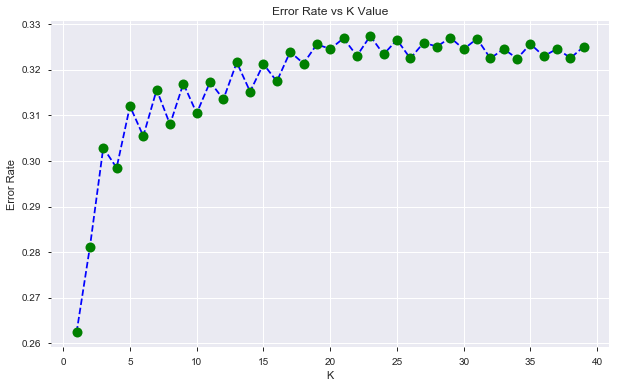

In [58]:
# Function
error_rate = []

for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

check for the lowest error rate from the graph above and then put that value in ther cell below and run model again !

In [59]:
# Fit new KNN
# Create model object
knn = KNeighborsClassifier(n_neighbors = 13)

# Fit new KNN on training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [60]:
# Predict new KNN
y_pred_knn_op = knn.predict(X_test)

In [61]:
# Score it with new KNN
print('K-Nearest Neighbors(KNN)')
print('k = 13')

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*40)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*40)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,2)
print('Accuracy',knn_op_accuracy,'%')


K-Nearest Neighbors(KNN)
k = 13


[[12959  3445]
 [ 3115  5481]]
--------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.81      0.79      0.80     16404
           1       0.61      0.64      0.63      8596

   micro avg       0.74      0.74      0.74     25000
   macro avg       0.71      0.71      0.71     25000
weighted avg       0.74      0.74      0.74     25000

--------------------------------------------------------------------------------
Accuracy 73.76 %


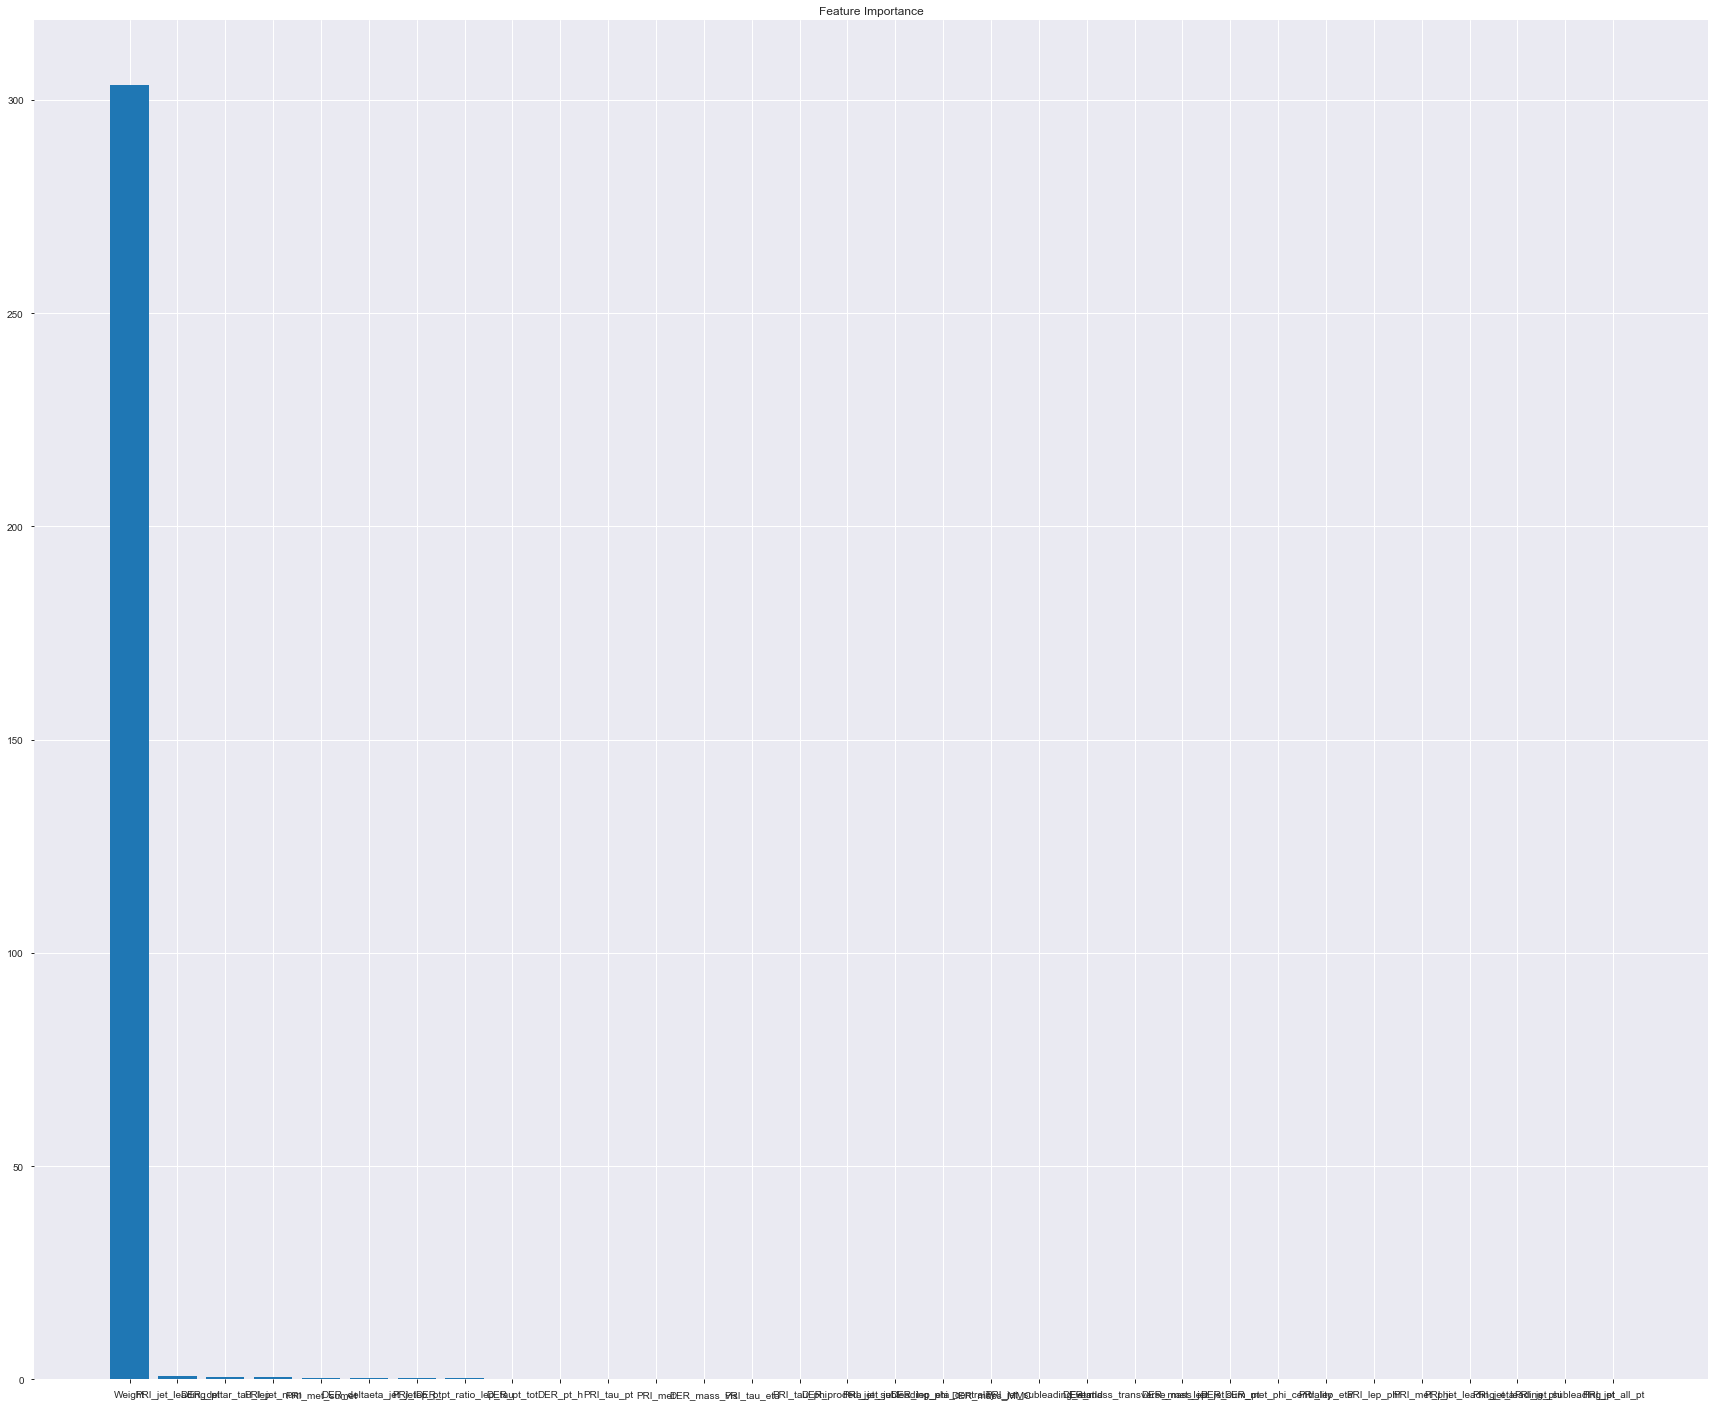

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline  

# Rearrange feature names so they match the sorted feature importances
model_features = [i[0] for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize = (30,25))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

DECISION TREES

In [63]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 1.0


In [64]:
# Calculate feature importances
importances = clf.feature_importances_
importances

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

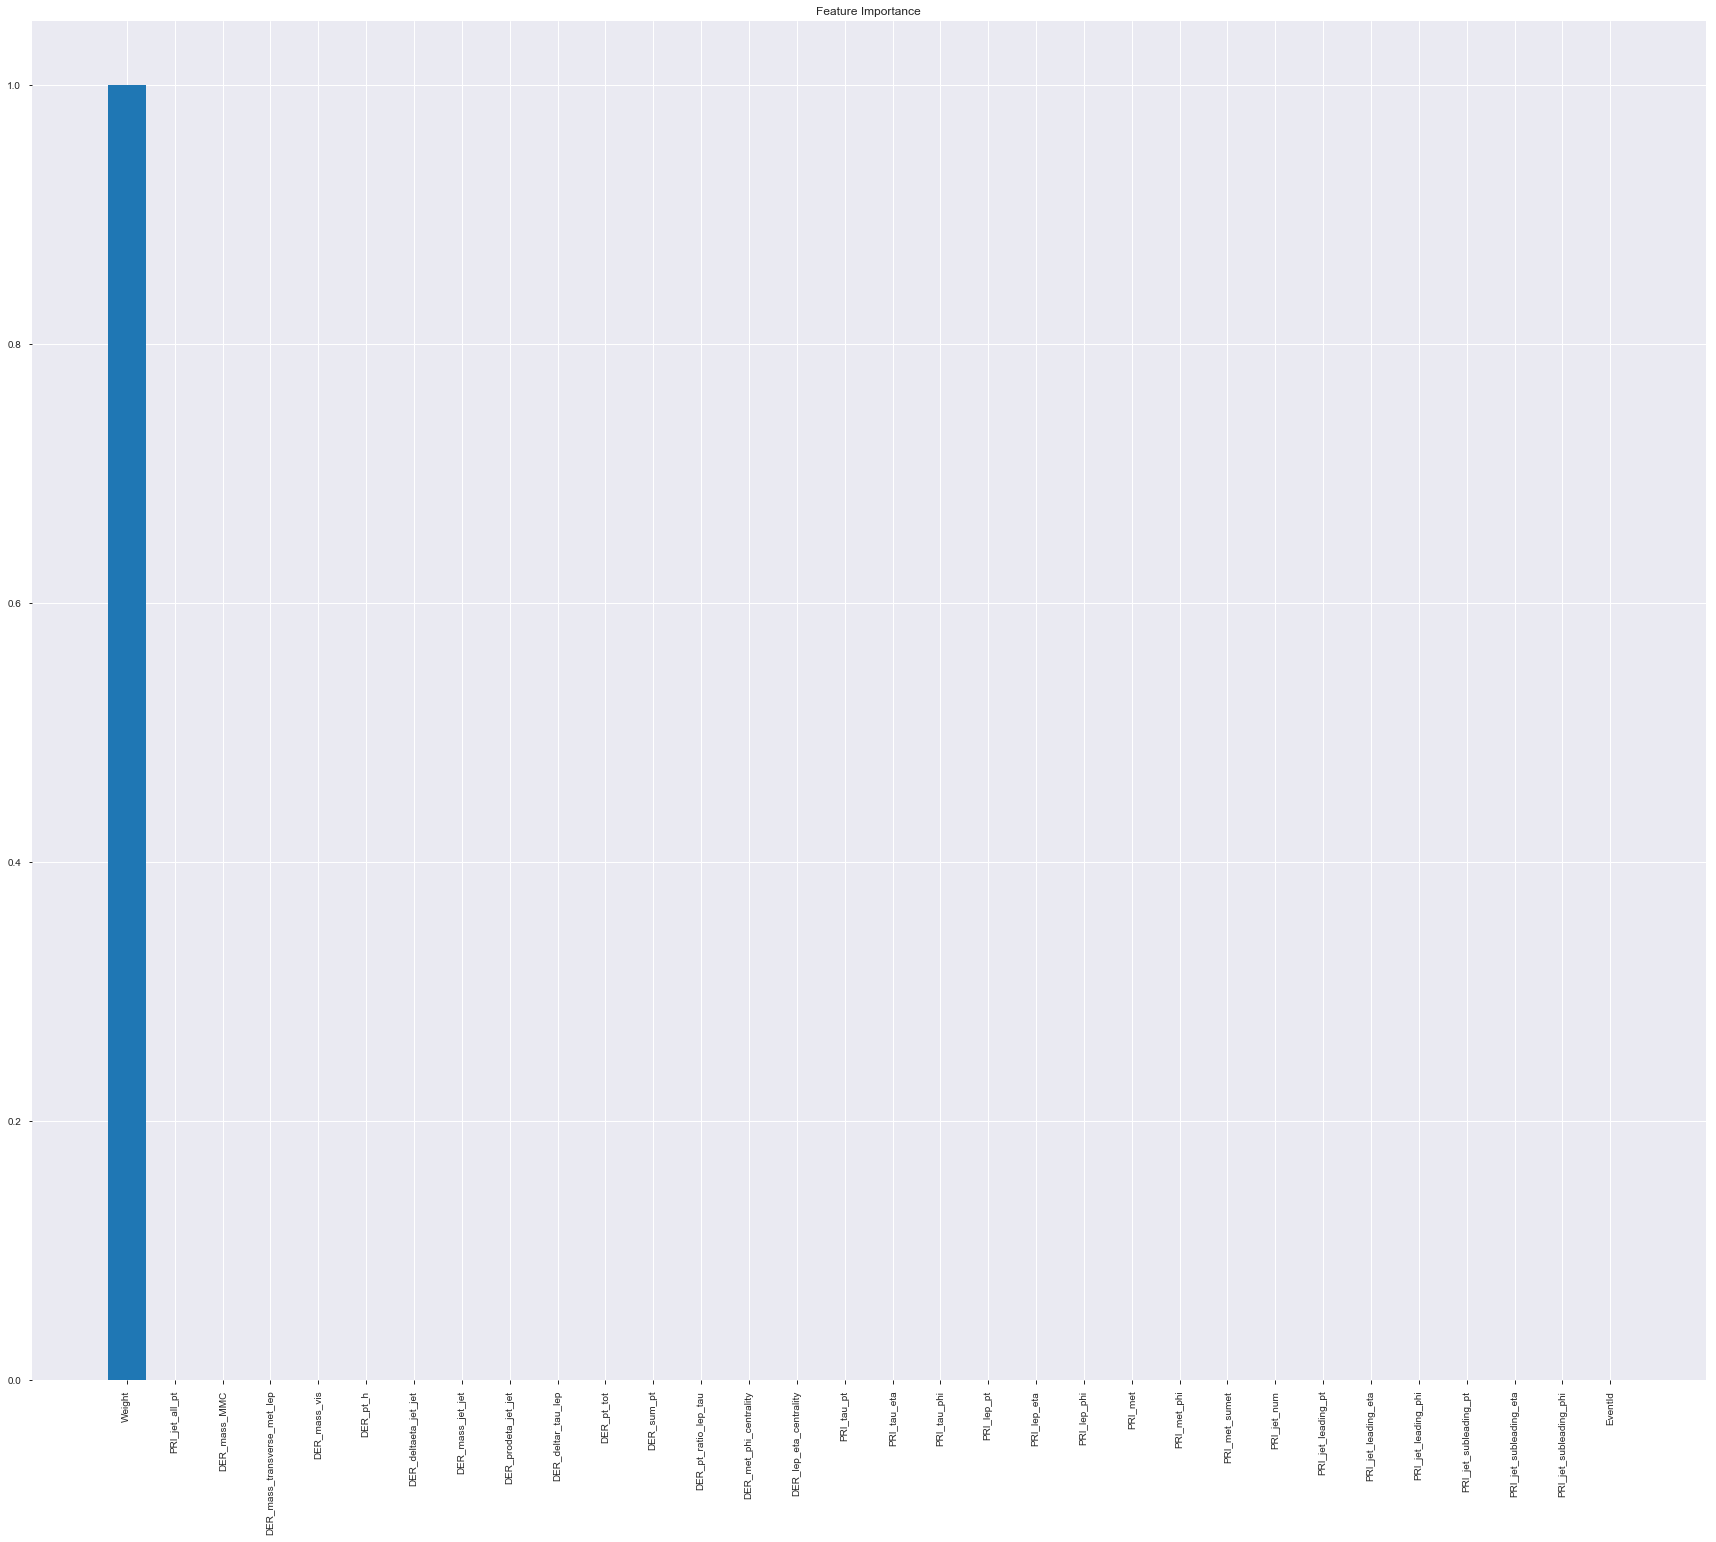

In [65]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure(figsize = (30,25))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [66]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}

In [70]:
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters, n_jobs = -1)
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
y_pred_dt = clf.predict(X_test)

In [73]:
def printTree(clf_tree):
    from sklearn import tree
    tree.export_graphviz(clf_tree,out_file='tree.dot') 
    from sklearn.externals.six import StringIO  
    import pydot 
    dot_data = StringIO() 
    tree.export_graphviz(clf_tree, out_file=dot_data) 
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    a=graph.write_png("tree.png") 
    from IPython.display import Image
    import os
    return Image(filename=os.getcwd()+'/tree.png')

In [78]:
# Score it
print('Decision Trees (DT)')
# print('k = 1')
print('\n')
# Confusion Matrix
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred_dt))

# Classification Report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_dt))

# Accuracy
print('--'*40)
knn_accuracy = round(accuracy_score(y_test, y_pred_dt)*100,1)
print('Accuracy',knn_accuracy,'%')

Decision Trees (DT)


Confusion Matrix
[[16404     0]
 [    0  8596]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16404
           1       1.00      1.00      1.00      8596

   micro avg       1.00      1.00      1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

--------------------------------------------------------------------------------
Accuracy 100.0 %


RANDOM FORESTS 

In [79]:
# Fit
# Import model object
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 200)

# Fit model to training data
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
# Predict
y_pred_rfc = rfc.predict(X_test)

In [81]:
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[16404     0]
 [    0  8596]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16404
           1       1.00      1.00      1.00      8596

   micro avg       1.00      1.00      1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

--------------------------------------------------------------------------------
Accuracy 100.0 %


In [92]:
param_grid = { 
    'n_estimators': [80,90, 100],   # no of trees
    'max_features': [0.2, 0.25 ],    # percentage of features included in tree WHERE TO SPLIT
    'max_depth' : [4, 5],    # TREE DEPTH
    'min_samples_leaf': [0.01, 0.02, 0.03]     
}

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=1, cv= 3,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [80, 90, 100], 'max_features': [0.2, 0.25], 'max_depth': [4, 5], 'min_samples_leaf': [0.01, 0.02, 0.03]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [95]:
CV_rfc.best_params_

{'max_depth': 4,
 'max_features': 0.2,
 'min_samples_leaf': 0.01,
 'n_estimators': 90}

In [96]:
# Score It
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*40)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*40)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,2)
print('Accuracy', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[16404     0]
 [    0  8596]]
--------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16404
           1       1.00      1.00      1.00      8596

   micro avg       1.00      1.00      1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000

--------------------------------------------------------------------------------
Accuracy 100.0 %


MULTIPLE DESICION TREES/ RANDOM FORESTS

In [24]:
import xgboost as xgb

In [25]:
xg_clf = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 2, alpha = 10, n_estimators = 100)

In [ ]:
xg_clf.fit(X_train,y_train)

In [ ]:
preds = xg_clf.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
params = {"objective":"multi:softprob",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 4, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=500,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

In [ ]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg
#     feat_imp = pd.Series(alg.get_booster().get_fscore())
#     feat_imp.plot(kind='bar', title='Feature Importances')
#     plt.ylabel('Feature Importance Score')

In [ ]:
train  = pd.concat([X_train, y_train], axis=1)
target = 'Label'
IDcol = 'X'

In [ ]:
xgb.XGBClassifier()

In [ ]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)

In [ ]:
alg.feature_importances_

In [ ]:
alg.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
gsearch1.best_params_

In [ ]:
gsearch1.best_score_

In [ ]:
preds = gsearch1.best_estimator_.predict(X_test)


test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

In [ ]:
# plot feature importance
plot_importance(alg)
pyplot.show()

In [ ]:
from xgboost import plot_importance

In [ ]:
alg.get_booster().get_fscore()

FINAL MODEL WITH PIPELINES